# Изучение закономерностей, определяющих успешность игр

В нашем распоряжении данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанры и платформы. Необходимо 


**Цель исследования** будет состоять из следующих пунктов:
1. Выявление каких-либо зависимостей, определяющие успешность продажи игры.
2. Анализ портрета пользователя по регионам.
3. Выявление наиболее популярных платформ и жанров.
4. Выявление актуального периода для анализа.


**Ход исследования**

Данные находятся в файле `games.csv`. О качестве данных ничего не известно. Поэтому перед  исследованием понадобится провести обзор данных.

На этапе предобработки данных надо будет устранить пропуски там, где это возможно. Во всех остальных случаях необходимо пояснить, почему пропуски остались нетронутыми. Проанализировать тип данных и изменить их, если потребуется.

Следующим пунктом будет добавление новых столбцов в таблицу для дальнейших рачетов и нахождения зависимостей.

Так же надо будет проверить гипотезы о равной пользовательской оценке платформ Xbox One и PC одинаковые и о том, что средние пользовательские рейтинги жанров Action и Sports разные.

И финальным будет исследовательский анализ с выявлением закономерностей, построением графиков и создание соответствующих выводов.
Таким образом, исследование пройдёт в шесть этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных
 4. Составление портрета пользователя по регионам
 5. Проверка гипотез
 6. Общий вывод

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('C:/Users/Alexander/Downloads/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видим, что в названиях столбцов присутствует верхний регистр, приведем их к общепринятому змеиному регистру

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что в некоторых столбцах присутствуют пропуски, а в некоторых не тот тип данных, который хотелось бы иметь.

Но обо всем по порядку:

1. В столбце 'name' потеряны 2 названия. Восстановить их не представляется возможным, поэтому избавимся от них. Аналогично с данными из столбца 'year_of_release'

2. В столбцах 'critic_score' и 'user_score' пропущено большое количество данных, поэтому их заполнить не представляется возможным - например, заполнение медианным значением сильно изменит ситуацию.

3. Некоторые столбцы имеют некорректный тип данных, например 'year_of_release' и 'user_score', поэтому надо будет изменить тип данных, предварительно исправив данные в 'user_score'.

## Предобработка данных

Выше написаны общие задачи для данного пункта, будем последовательно их выполнять и комментировать по необходимости. По мере продвижения будет описываться каждая встреченная проблема. Единственное, что не будет затронуто - 2 пункт, в частности, причины пропусков. В столбце 'critic_score' пропуски могут быть связаны с годом выхода игры, например, игра слишком "старая". Так же это может быть связано с определенными затратами времени на прохождение игры, подготовку материала по ней и публикацию обзора. 

А в случаях, когда для рейтинга нужно как минимум несколько таких оценок, затраты времени еще больше. Ну и можно предположить, что для некоторых игр не хватило критиков. Например, игру прошло 2 человека, а по какому-нибудь стандарту необходимо, чтобы оценило игру 5 критиков. А критикам некогда, на дворе 16 год, они Ведьмака 3 проходят. Помимо этого может быть связано с жанром игры, например музыкальные игры не так интересны для большинства. Пропуски в столбце 'user_score' объяснить труднее, потому что игроки зачастую оценивают пройденные игры, тем более, сейчас даже в яндексе при поиске игры появляется опрос "вы играли, поставьте оценку игре". 

Поэтому пропуски в данном столбце могу объяснить только потерей части данных.

Применим метод .shape к датафрейму после каждого удаления данных. В этом случае наглядно будет видно сколько строк/столбцов было удалено. Иногда может быть ошибка в коде из-за которой удаляется больше чем ожидалось, используя этот способ, мы сможем сразу найти такую проблему

In [6]:
df = df.dropna(subset = ['name'])
df.shape

(16713, 11)

In [7]:
df = df.dropna(subset = ['year_of_release'])
df.shape

(16444, 11)

In [8]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [9]:
display(df['rating'].unique())
df['rating'] = df['rating'].fillna('other')

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Хоть раньше и было написано про большое количество пропусков, про этот столбец там намеренно не упоминалось. Логика данного решение и заполения пропусков на 'E' такова: Мы знаем, что ESRB анализирует игры и выставляет им оценки. Есть вероятность, что они анализируют не все вышедшие игры и не присваивают каждой рейтинг, но в первую очередь она будет ставить возрастные метки, например, 'M'. Некоторые кампании специально будут требовать оценки своей игры от ESRB, например, если их продукт - развивающая игра для детей.

Но тут стоит заметить, что ESRB - американское что это рейтинговое агентство. При изучении этого вопроса глубже, задаемся вопросом, а есть ли что-то подобное в Японии. И выясняется, что есть - CERO - Японское рейтинговое агентство. Ну а отсюда уже и недалеко до вывода, что Японские игры не имеют оценки ESRB, так как Американцы их не оценивают

В данном случае есть вероятность, что пропуски связаны не с потерей данных или логикой, описанной выше, а с тем, что рейтинг данным играм ставило другое рейтинговое агенство(CERO). Хотя, лично по моему мнению, это несколько нелогично, так как рейтинги американского агенства и японского разные, как и принципы оценивания. Соответственно, можно сказать, что в случаях, когда игра собирает большую аудиторию в Японии, игра становится хотя бы отчасти попялурной и за ее пределами, где за дело возьмется ESRB. И, следуя этой логике, можно предположить, что данные игры популярны исключительно в Японии

Но в данном случае примем во внимание этот факт и заполним пропуски на 'other', так как оценка есть, она другая, даже из другого агенства. Просто не у нас.

In [10]:
display(df['user_score'].unique())
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype(float)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Теперь анализируем столбец 'user_score' и видим там аббревиатуру 'tbd' - To Be Determinated (подлежит определению(много расшифровок, много переводов, но суть одна)). Для нас это не представляет какой-либо информации, так как это - отсутствие оценки, соответственно, заменяем его на NaN

Замена на любую оценку(медиана, среднее, 0, еще какие-то варианты) не является правильной, так как таким образом мы изменим ситуацию и реальный пользовательский рейтинг. Так какой-то хороший проект получит слишком низкую оценку, плохой - хорошую ,и так далее.

In [11]:
df['summ_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [12]:
df.duplicated().sum() #Явных дубликатов нет

0

In [13]:
df.duplicated(subset=['name', 'platform']).sum() #Неявные есть

3

In [14]:
df[df.duplicated(subset=['name', 'platform']) == True] #Узнали, какие именно строки считаются дубликатами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


In [15]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,other,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,other,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,other,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


Здесь строки **1190** и **1591** посчитались, как дубликаты, но это разные версии игры(по крайней мере, я так нашел). Поэтому можно предположить, что это разные игры с одним названием(там 7 лет разницы, вряд ли просто перевыпуск). Аналогично с **5972** и **11715**. Поэтому оставим данные строки нетронутыми(одинаковый реейтинг не смутил, может, и переиздание, но тогда графика другая, другая аудитория и т.д.)

In [16]:
df[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Здесь явный дубликат, **604** и **16230** строки совпадают полностью, причем, последняя продалась исключительно в европейском сегменте. Скорее всего, речь идет о каком-то дополнении или ошибке. Но после долгих поисков решения проблемы "как объединить дубликаты в 1" само решение не было найдено, поэтому было принято решение оставить все как есть(решение изменится, если поделишься строчкой кода для объединения дубликатов))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  summ_sales       16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Все пункты, написанные в выводе прошлого пункта, были выполнены - от большей части пропусков удалось избавиться, типы данных были изменены, а так же был добавлен новый столбец, показывающий общие продажи продукта - 'summ_sales'

Итак, мы провели предварительный анализ данных, проверили данные на наличие пропусков и затем обработали их (аргументированно заполнили / удалили / оставили как есть). Теперь можно приступать собственно к анализу данных и ответам на вопросы проекта.

## Исследовательский анализ данных

Стоит пояснить следующее действие. Агрегация по count() покажет нам число игр, выпущенных на всех платформах, в разрезе лет. Т.е. если одна и та же игра (name) вышла в некоем году на одной платформе, агрегат == 1. Если на 2-х платформах, агрегат == 2, ну и так далее. 

Я считаю, что именно такая логика здесь и необходима(счиитаем ВСЕ игры с учетом платформ, а не 1 игра - 5 платформ. Объясню свою логику - для выпуска на консоль разработчики точно знают ее характеристики, поэтому они могут выставить необходимые настройки графики и опираться на них. При этом не стоит забывать про настройку контроллера, который разный, например, у PS4 и Wii. Помимо этого, у каждой платформы есть особенности, накладывающие определенные ограничения(например, на консоли не хватит мощности на качество 4К и гиперреализм в то время как на компьютере это возможно). Но на компьютерах придется адаптировать игру и под слабые компьютеры, под разные системы, под разное железо, видеокарты и так далее. Не считая настройки контроллера, адаптирования управления и многих других различий. Именно поэтому считаю, что должна считаться каждая игра на каждой платформе как отдельная игра. К примеру, раз уж заговорили про Ведьмака, он совершенно по-разному ощущается на геймпаде и на компьютере.

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


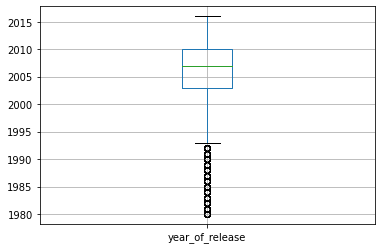

In [18]:
df.boxplot('year_of_release')
df.groupby('year_of_release', as_index=False)['name'].count()

И на графике и в таблице мы можем увидеть, что с 1993 года начинается интенсивный рост выпуска игр, он идет до 2008, после чего наблюдается спад. Поэтому при анализе мы може отбросить малую часть данных, находящуюся за "усами", в частности, игры до 1994 года

In [19]:
df.groupby('platform')['summ_sales'].sum().sort_values(ascending=False).head(10) #Топ-10 платформ по общим продажам

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: summ_sales, dtype: float64

<AxesSubplot:xlabel='year_of_release'>

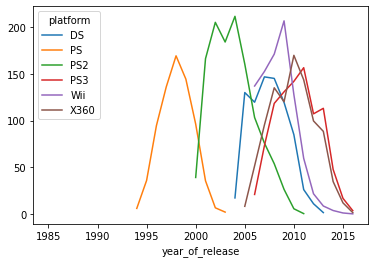

In [20]:
names = df.pivot_table(index='platform', values='summ_sales', aggfunc='sum').sort_values('summ_sales', ascending=False)
names = names.index[:6].tolist() #топ-6, потому что 7 место сильно отличается
data = df.query('platform in @names')
data.pivot_table(index='year_of_release', columns='platform', values='summ_sales', aggfunc='sum').plot()

Стоит заметить, что на графиках видно, что средний "срок актуальности" платформы находится на уровне 10 лет. Соответственно, для нашего актуального периода мы можем брать данные как максимум за последние 10 лет

In [21]:
df.groupby('year_of_release')['summ_sales'].sum()

year_of_release
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.16
1993     45.99
1994     79.23
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.11
2000    201.66
2001    331.46
2002    394.97
2003    357.54
2004    418.68
2005    457.82
2006    517.71
2007    604.75
2008    671.50
2009    658.82
2010    590.13
2011    507.58
2012    355.84
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: summ_sales, dtype: float64

Как было написано 2 ячейками выше, актуальный период должен быть не больше 10 лет. Но нам нужно выбрать актуальный период, помогающий спрогнозировать количество игр на 2017 год. Так как сфера электроники динамично меняется, требуется брать период не более 3 лет, этот срок и будет использоваться для анализа

In [22]:
data = df.query('year_of_release >= 2014')
display(data.groupby('platform')['summ_sales'].sum().sort_values(ascending=False))
names = data.pivot_table(index='platform', values='summ_sales', aggfunc='sum').sort_values('summ_sales', ascending=False)
names = names.index[:6].tolist() #Снова берем топ-6, так как отрыв между 5 и 6 не такой большой, как между 6 и 7
data = data.query('platform in @ names')

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: summ_sales, dtype: float64

<AxesSubplot:xlabel='year_of_release'>

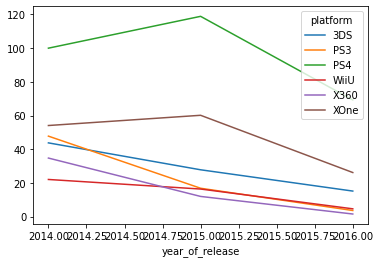

In [23]:
data.pivot_table(index='year_of_release', columns='platform', values='summ_sales', aggfunc='sum').plot()

In [24]:
data.groupby('year_of_release')['name'].count() #Смотрим, сколько значений остается в конечном датафреме для прогнозов

year_of_release
2014    418
2015    439
2016    362
Name: name, dtype: int64

Ниже будем строить графики распределения продаж для каждой из отобранных плаформ. В каждом из графиков будет видно, что бОльшая часть игр продалась общей стоимостью не более 1 миллиона копий. Поэтому можно подумать, что остальные данные не нужны или это - выбросы. Но, с точки зрения магазина, наиболее выгодно взять именно наиболее популярные игры и продавать их по всему миру

Поэтому никаких срезов или ограничений не предусматривается(Ну или, как вариант, ограничивать со стороны минимума продаж)

<AxesSubplot:title={'center':'summ_sales'}, xlabel='platform'>

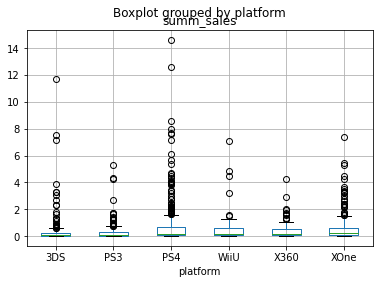

In [25]:
data.boxplot('summ_sales', 'platform')

Видим, что масштаб слишком большой из-за выбросов. Ограничим боксплот по оси y

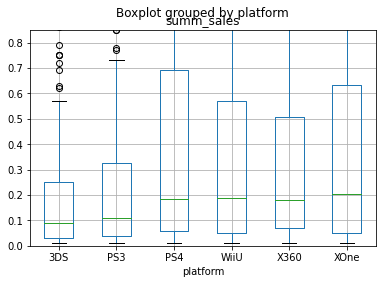

In [26]:
data.boxplot('summ_sales', 'platform')

plt.ylim(0, 0.85)
plt.show()

Если смотреть по данным, полученным методом describe(), можно прийти к выводу, что наиболее выгодная платформа - PS4, так как 75% всех значений находится на уровне около полутора млн. копий, что является максимальным значением

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 31 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1219 non-null   object 
 1   platform         1219 non-null   object 
 2   year_of_release  1219 non-null   int64  
 3   genre            1219 non-null   object 
 4   na_sales         1219 non-null   float64
 5   eu_sales         1219 non-null   float64
 6   jp_sales         1219 non-null   float64
 7   other_sales      1219 non-null   float64
 8   critic_score     548 non-null    float64
 9   user_score       691 non-null    float64
 10  rating           1219 non-null   object 
 11  summ_sales       1219 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 123.8+ KB


Здесь мы можем заметить, что данные за актуальный период и по актуальным платформам составляет 1/16 от общего датафрейма

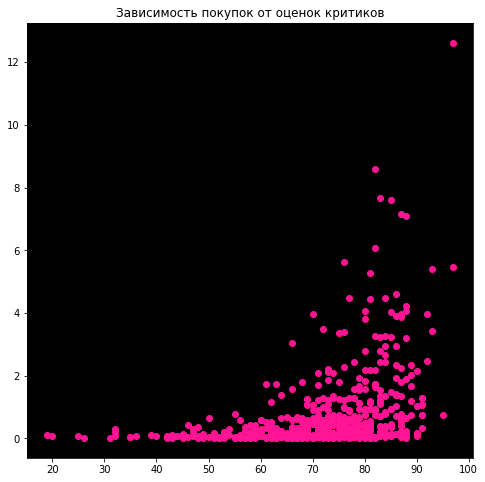

0.3863209760179763

In [28]:
x = data['critic_score']
y = data['summ_sales']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')

ax.set_facecolor('black')
ax.set_title('Зависимость покупок от оценок критиков')

fig.set_figwidth(8)
fig.set_figheight(8)

plt.show()

data['summ_sales'].corr(data['critic_score'])

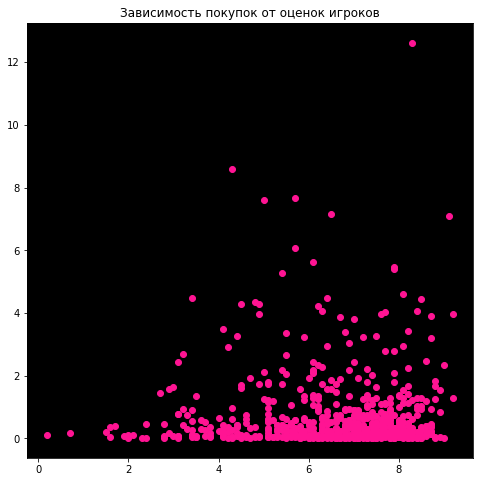

0.004264283332695286

In [29]:
x = data['user_score']
y = data['summ_sales']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')

ax.set_facecolor('black')
ax.set_title('Зависимость покупок от оценок игроков')

fig.set_figwidth(8)
fig.set_figheight(8)

plt.show()

data['summ_sales'].corr(data['user_score'])

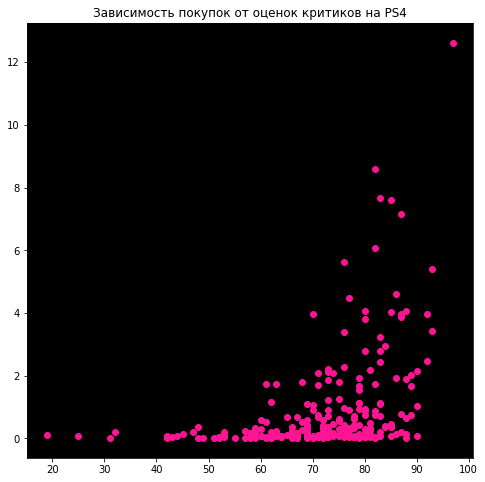

0.40266141068104083

In [30]:
x = data[data['platform'] == 'PS4']['critic_score']
y = data[data['platform'] == 'PS4']['summ_sales']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')

ax.set_facecolor('black')
ax.set_title('Зависимость покупок от оценок критиков на PS4')

fig.set_figwidth(8)
fig.set_figheight(8)

plt.show()

data[data['platform'] == 'PS4']['summ_sales'].corr(data[data['platform'] == 'PS4']['critic_score'])

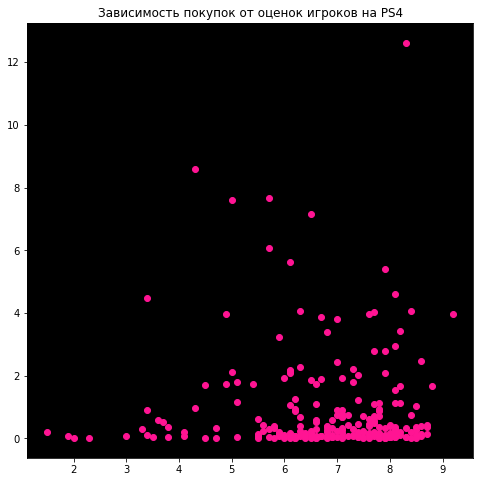

-0.040131589472697356

In [31]:
x = data[data['platform'] == 'PS4']['user_score']
y = data[data['platform'] == 'PS4']['summ_sales']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')

ax.set_facecolor('black')
ax.set_title('Зависимость покупок от оценок игроков на PS4')

fig.set_figwidth(8)
fig.set_figheight(8)

plt.show()

data[data['platform'] == 'PS4']['summ_sales'].corr(data[data['platform'] == 'PS4']['user_score'])

Выше мы строили графики рассеивания и смотрели на корреляцию между общими продажами и оценками игроков\критиков.  Можно заметить, что оценки пользователей зачастую выше критиков, а так же, что определенная зависимость есть. Чем выше оценка, тем выше продажи. Это логично, так как критику зачастую делают обзоры и оценку игр, пользуясь пресс-релизом. Соответственно, если критикам понравилось, он выкладывает интересный обзор и ставит высокую оценку, что привлекает новых покупателей игры

Зависимость между общими продажами и оценками игроков не столь заметна(например, на PS4 корреляция практически равна 0). В общем случае здесь так же с увеличением одного растет другое, но можно увидеть на графике, что есть бОльшее количество отклонений от этого правила. Если у критиков в диапазоне от 40 до 60 выше 2 млн. копий не набрала ни 1 игра, то у игроков в диапазоне от 4 до 6 игр с продажами более 5 млн.копий гораздо больше 10.

Именно поэтому целесообразнее опираться на оценку критиков

*коэффициент корелляции показывает лишь наличие линейной связи, здесь в обоих случаях нет сильной зависимости между оценкой и продажами, поэтому можно сделать вывод, что зависимость есть, и лучше опираться на оценку критиков, но не слишком сильно полагаться на это*

In [32]:
data.groupby('genre')['summ_sales'].median().sort_values(ascending=False)

genre
Shooter         0.680
Sports          0.315
Role-Playing    0.170
Platform        0.160
Fighting        0.150
Racing          0.130
Simulation      0.120
Action          0.120
Misc            0.110
Adventure       0.060
Strategy        0.060
Puzzle          0.050
Name: summ_sales, dtype: float64

~~А здесь мы видим боль в глазах любителей стратегий(да просто HMM3 вышла до 2008 года)...~~

Можно заметить, что наиболее популярный жанр - Shooter, наименее - Puzzle.

Динамичные игры более популярны(шутеры, спортивные игры и т.д.), более спокойные и размеренные не так интересны(пазлы, стратегии, приключения...)

## Составление портрета пользователя по регионам

Ниже будет классическая группировка по общим продажам по каждому региону для понимания, какая платформа и какой жанр наиболее популярен в разных регионах

In [33]:
display(data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5))
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

genre
Shooter         76.83
Action          69.83
Sports          45.71
Role-Playing    31.14
Misc            13.15
Name: na_sales, dtype: float64

In [34]:
display(data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5))
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
3DS      16.12
X360     15.49
Name: eu_sales, dtype: float64

genre
Action          69.32
Shooter         61.87
Sports          44.17
Role-Playing    24.91
Racing          13.51
Name: eu_sales, dtype: float64

In [35]:
display(data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5))
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     44.24
PS4     15.02
PS3     11.22
WiiU     7.31
XOne     0.32
Name: jp_sales, dtype: float64

genre
Role-Playing    26.47
Action          24.48
Fighting         5.91
Shooter          4.86
Misc             3.74
Name: jp_sales, dtype: float64

Можно заметить, что общие продажи в японском регионе гораздо ниже, чем в остальных. Помимо этого, в нем наиболее популярна платформа 3DS, не столь популярная в других регионах. Аналогично с жанрами, в японском регионе наиболее популярен Role-Playing, тогда как в остальных регионах он находится на 4 месте по популярности.

Сравнивая NA и EU регионы, можно сказать, что они похожи. Наиболее популярные жанры и платформы практически идентичны(например, в EU платформа PS3 находится на 3 месте, а X360 находится на 5, в NA - наоборот, а на 1 месте по жанрам в NA находится Shooter, а в EU сегменте - Action)

In [36]:
data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
rating,,,
E,50.28,55.05,8.89
E10+,30.80,22.22,4.18
M,91.25,85.40,7.21
T,36.05,29.21,10.73
other,63.85,54.71,47.18


Видно, что наиболее популярный жанр в Японии - 'other'. Напомню, что так мы обозначили пропущенные значения в столбце 'rating', предположив, что пропущенные данные принадлежат разработчикам из Японии. На 2 месте - игры жанра 'T' - для подростков.

Таким образом мы видим, что японские игры пользуются популярностью не только в японии(тогда тем более работает мой довод про необходимость оценки американской кампанией, но да ладно). Наиболее популярные жанры в NA и EU регионах - 'M' и 'E' - игры с возрастным ограничением 18+ и игры для всех. За исключением сегмента 'E', EU рынок полностью повторяет предпочтения NA сегмента, но с меньшим количеством покупок(в 'E' наоборот)

## Проверка гипотез

необходимо проверить, равна ли пользовательская оценка игр платформы PC пользовательской оценке игр платформы X360. Для этого будем проводить t-тест ~~потому что я так чувствую~~, так как мы не можем найти просто среднее и сравнить. Нам интересно анализировать именно распределение, поэтому t-тест. Пороговое значение устанавливается на уровне 0.05, так как оно считается стандартным(более точное значение берут там, где критически важен результат, например, в медицине, здесь такое не требуется)

Соответственно, наша нулевая гипотеза звучит как "рейтинги одинаковые", альтернативная - "пристутствуют значимые различия"

Аналогично будет с жанрами

In [37]:
alpha = .05
results = st.ttest_ind(
    data[data['genre'] =='Sports']['user_score'],
    data[data['genre'] =='Action']['user_score'],
    equal_var=False, 
    nan_policy='omit'
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.9805716308031527e-12
Отвергаем нулевую гипотезу


Здесь получилась интересная ситуация: обе платформы, сравниваемые ниже, не попали в отфильтрованный датафрейм по причине низких продаж по сравнению с другими платформами. Но раз требуется сравнить, считаю, что надо сравнивать данные за актуальный период(как минимум, потому, что это пригодно для прогнозирования, как максимум, потому, что на платформе PC игры выходят на протяжении всей своей истории, а старым проектам зачастую ставят высокие оценки из-за ностальгии или каких-либо других необоснованных причин)

In [38]:
data = df.query('year_of_release >=2008')

alpha = .05
results = st.ttest_ind(
    data[data['platform'] =='XOne']['user_score'],
    data[data['platform'] =='PC']['user_score'],
    equal_var=False, 
    nan_policy='omit'
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11111296036738469
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

В процессе работы были выявлены и исправлены, где это возможно, исходные данные(об этом ниже). Были исправлены неточности в типах данных, данные об общих продажах были добавлены в датафрейм. Так же были проанализированы данные, найдены различные закономерности, построены соответствующие графики и каждый из них был прокомментирован. Помимо этого, рядом с графиками, на которых видна зависимость одного фактора от другого, был посчитан коэффициент корреляции, свидетельствующий о наличии или отсутствии линейной взаимосвязи.

Во - первых, в исходных данных есть пропущенные данные, которые статистически важны, поэтому их невозможно заполнить каким-либо значением. Это столбцы  'critic_score' и 'user_score'. Требуется проверить исходные данные и заполнить пропуски. В случае с 'user_score' часть данных будет получена вариантом "просто подождать", но это не сильно улучшит ситуацию.

Во-вторых, были выявлены следующие закономерности:

1. Количество продаж **частично зависит от оценки критиков**. При увеличении рейтинга есть тенденция к увеличению общих продаж. От оценки игроков количество продаж не так сильно зависит, поэтому лучше опираться на рейтинг критиков.

2. Наиболее популярные платформы в мире - **PS4, XOne, 3DS, PS3, X360, WiiU**. Наиболее популярные жанры - **Shooter, Sports, Role-Playing, Platform, Fighting**    

3. Средний "срок жизни" - период появления и затухания популярности новой консоли составляет около **10 лет**.

4. В зависимости от региона наиболее популярные жанры и платформы меняются. Обособленно от других регионов находится японский регион. Общие продажи в нем гораздо ниже, чем в остальных, наиболее популярная платформа - 3DS, занимающая 4 позиции в других регионах. Аналогично с жанрами, в японском регионе наиболее популярен 'other'(японские игры не оценивает американское агенство, вероятно, часть данных утеряна, поэтому все пропуски были заменены на данный тип), тогда как в остальных регионах он находится на 3 месте по популярности. Так же в японском регионе 2 место по популярности занимают игры для подростков('T' - игры для людей от 13 лет). Сравнивая NA и EU регионы, можно сказать, что они похожи. Наиболее популярные жанры в NA и EU регионах - 'M' и 'E' - игры с возрастным ограничением 18+ и игры для всех. За исключением сегмента 'E', EU рынок полностью повторяет предпочтения NA сегмента, но с меньшим количеством покупок(в 'E' наоборот)

5. При анализе продаж игр на различных платформах всегда находились игры, резко отрывающиеся от других свой популярностью. Считаю, что это не выбросы или ошибки, а игры-бестселлеры, соответственно, рекомендуется найти такие игры и продавать их в первую очередь

6. Гипотеза о равности средней пользовательской оценки игр на платформе PC пользовательской оценке игр на платформы X360 **не была подтверждена**

7. Гипотеза о том, что средний рейтинг жанра Action не равен среднему рейтингу жанра Sports **была подтверждена**